# Lorenz Equations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [2]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8/3$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [3]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    # initialzie variables ############################################
    sig = 10
    p = 28
    B = 8/3
    
    # calculate a system of derivatives ###############################
    dx = sig*(x[1]-x[0])
    dy = p*x[0]-x[1]-x[0]*x[2]
    dz = x[0]*x[1]-B*x[2]
    
    return np.array([dx,dy,dz])

<IPython.core.display.Javascript object>


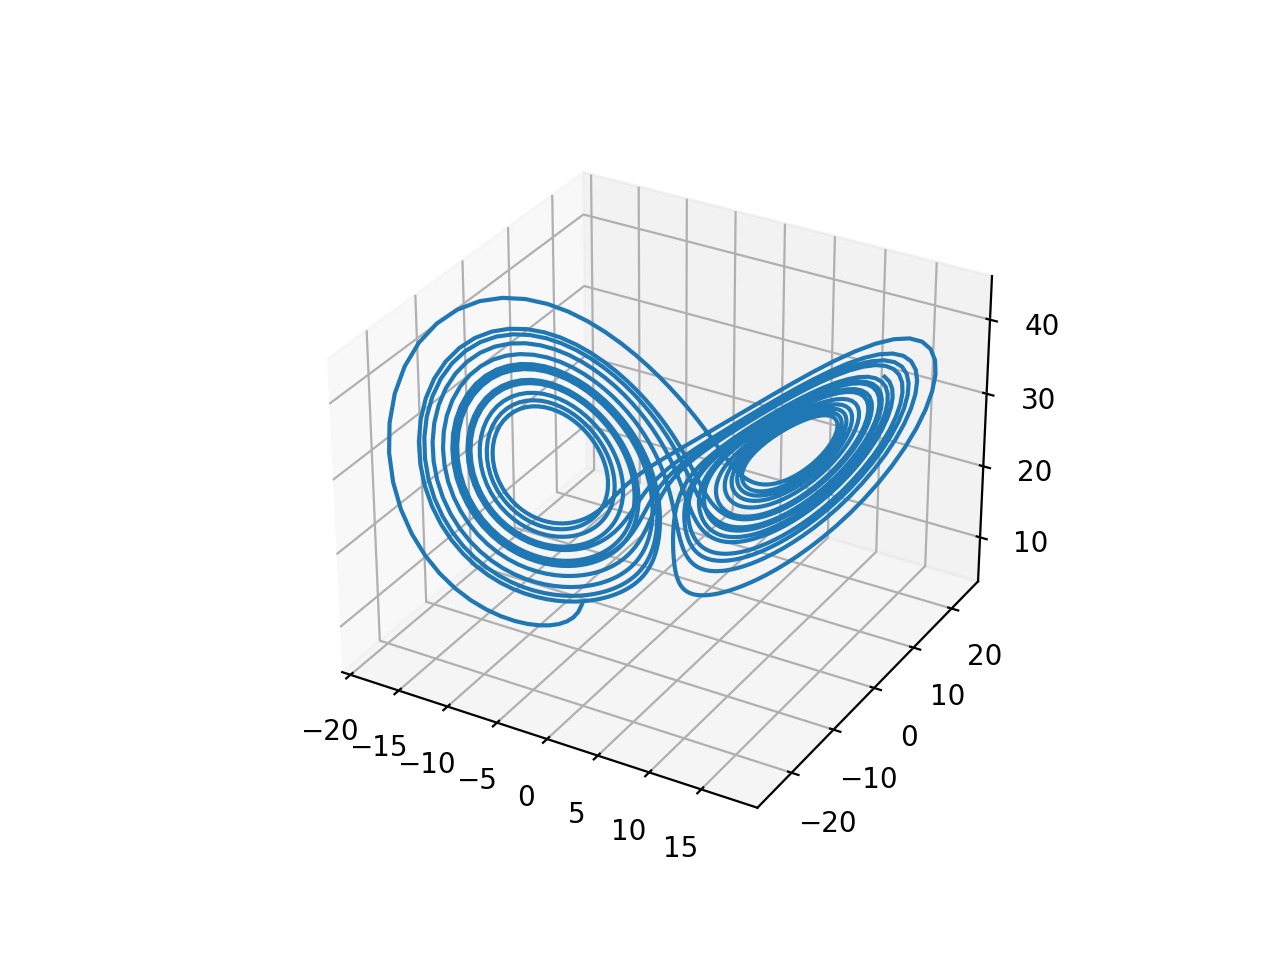

In [9]:
# prepare initial conditions ######################################
x_0 = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
t_0 = 0
t_f = 20
t = np.arange(t_0, t_f, .01)

# find a solution to the system ###################################
sol = odeint(lorenz, x_0, t)

# plot results ####################################################
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sol[:, 0],sol[:, 1],sol[:, 2])
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


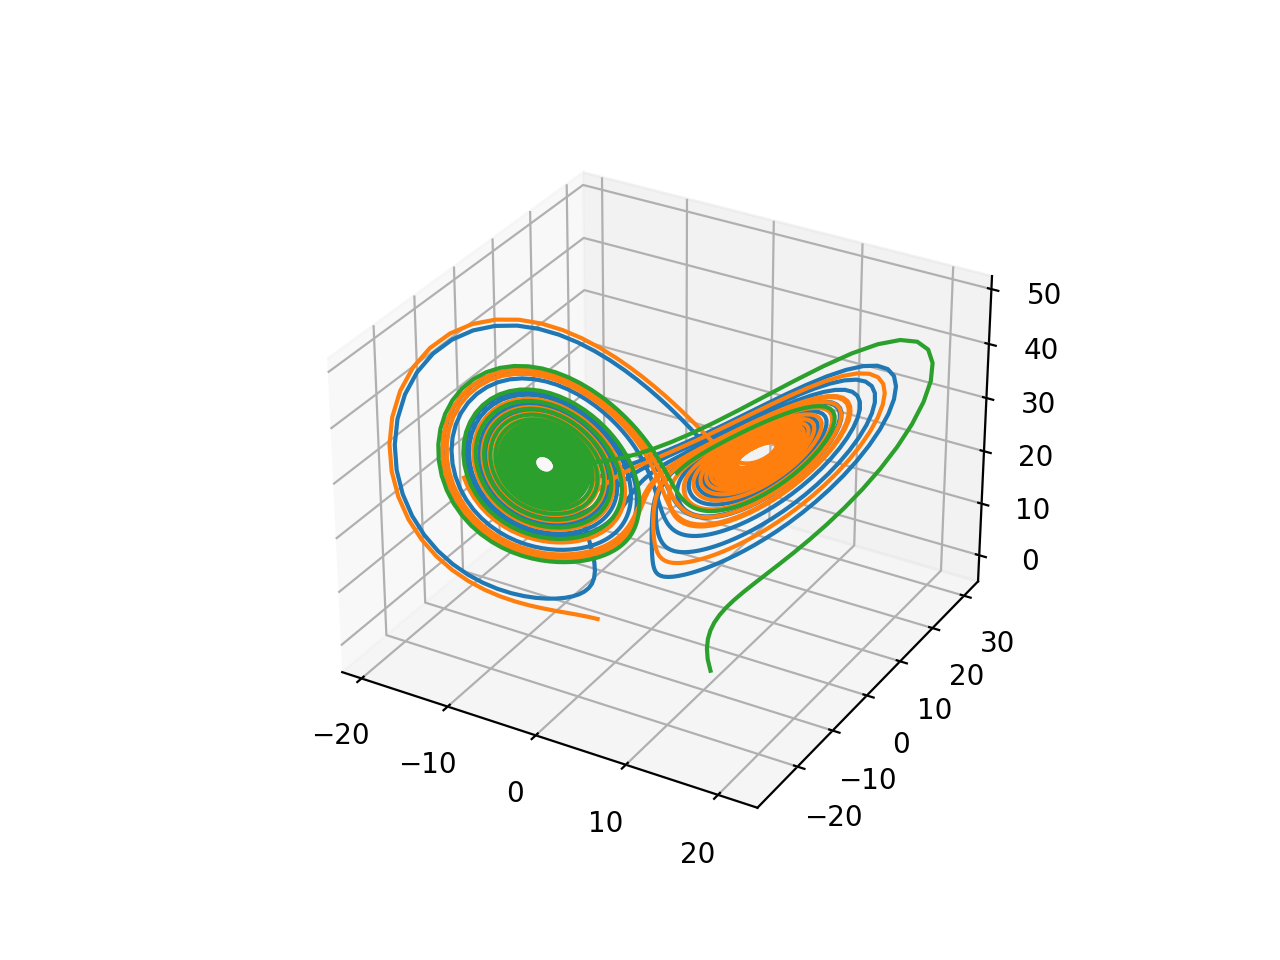

In [10]:
# prepare initial conditions ######################################
x_0 = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
x_1 = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
x_2 = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])

# find a solution to the system ###################################
sol_0 = odeint(lorenz, x_0, t)
sol_1 = odeint(lorenz, x_1, t)
sol_2 = odeint(lorenz, x_2, t)

# plot results ####################################################
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sol_0[:, 0], sol_0[:, 1], sol_0[:, 2])
ax.plot3D(sol_1[:, 0], sol_1[:, 1], sol_1[:, 2])
ax.plot3D(sol_2[:, 0], sol_2[:, 1], sol_2[:, 2])
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [6]:
# prepare initial conditions ######################################
x_0 = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
x_1 = x_0 + np.random.randn(3)*(1e-10)
t_0 = 0
t_f = 25
t = np.arange(t_0, t_f, .01)

# find a solution to the system ###################################
sol0 = odeint(lorenz, x_0, t)
sol1 = odeint(lorenz, x_1, t)

# strip out x, y, and z data ######################################
x_0_x = sol0[:, 0]
x_0_y = sol0[:, 1]
x_0_z = sol0[:, 2]
x_1_x = sol1[:, 0]
x_1_y = sol1[:, 1]
x_1_z = sol1[:, 2]

# get max and min values for plot boundaries ######################
max_x = max(np.max(x_0_x), np.max(x_1_x))
min_x = min(np.min(x_0_x), np.min(x_1_x))
max_y = max(np.max(x_0_y), np.max(x_1_y))
min_y = min(np.min(x_0_y), np.min(x_1_y))
max_z = max(np.max(x_0_z), np.max(x_1_z))
min_z = min(np.min(x_0_z), np.min(x_1_z))

# plot results ####################################################
animation.writer = animation.writers['ffmpeg']
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim((min_x-5, max_x+5))
ax.set_ylim((min_y-5, max_y+5))
ax.set_zlim((min_z-5, max_z+5))

# create particles and trajectories ###############################
x_0_particle, = plt.plot([],[], marker='o', color='red',markersize=2)
x_0_traj, = plt.plot([],[], color='red', alpha=0.1)
x_1_particle, = plt.plot([],[], marker='o', color='blue',markersize=1)
x_1_traj, = plt.plot([],[], color='blue', alpha=0.1)

# define update function ##########################################
def update(i):
    x_0_particle.set_data(x_0_x[:i],x_0_y[:i])
    x_0_particle.set_3d_properties(x_0_z[:i])
    x_0_traj.set_data(x_0_x[:i+1],x_0_y[:i+1])
    x_0_traj.set_3d_properties(x_0_z[:i+1])
    x_1_particle.set_data(x_1_x[:i],x_1_y[:i])
    x_1_particle.set_3d_properties(x_1_z[:i])
    x_1_traj.set_data(x_1_x[:i+1],x_1_y[:i+1])
    x_1_traj.set_3d_properties(x_1_z[:i+1])
    
    return x_0_particle, x_0_traj, x_1_particle, x_1_traj

# plot 2500 frames and save animation #############################
ani = animation.FuncAnimation(fig, update, frames=range(2500), interval=25)
ani.save('lorenz_animation1.mp4')

# divergence occurs around the 50 second mark

<video src='lorenz_animation1.mp4' controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [7]:
# prepare initial conditions ######################################
x_0 = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
t_0 = 0
t_f = 25
t = np.arange(t_0, t_f, .01)

# find a solution to the system ###################################
sol_0 = odeint(lorenz, x_0, t, atol=1e-15, rtol=1e-13)
sol_1 = odeint(lorenz, x_0, t, atol=1e-12, rtol=1e-10)

# strip out x, y, and z data ######################################
x_0_x = sol_0[:, 0]
x_0_y = sol_0[:, 1]
x_0_z = sol_0[:, 2]
x_1_x = sol_1[:, 0]
x_1_y = sol_1[:, 1]
x_1_z = sol_1[:, 2]

# get max and min values for plot boundaries ######################
max_x = max(np.max(x_0_x), np.max(x_1_x))
min_x = min(np.min(x_0_x), np.min(x_1_x))
max_y = max(np.max(x_0_y), np.max(x_1_y))
min_y = min(np.min(x_0_y), np.min(x_1_y))
max_z = max(np.max(x_0_z), np.max(x_1_z))
min_z = min(np.min(x_0_z), np.min(x_1_z))

# plot results ####################################################
animation.writer = animation.writers['ffmpeg']
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim((min_x-5, max_x+5))
ax.set_ylim((min_y-5, max_y+5))
ax.set_zlim((min_z-5, max_z+5))

# create particles and trajectories ###############################
x_0_particle, = plt.plot([],[], marker='o', color='red',markersize=2)
x_0_traj, = plt.plot([],[], color='red', alpha=0.1)
x_1_particle, = plt.plot([],[], marker='o', color='blue',markersize=1)
x_1_traj, = plt.plot([],[], color='blue', alpha=0.1)

# define update function ##########################################
def update(i):
    x_0_particle.set_data(x_0_x[:i],x_0_y[:i])
    x_0_particle.set_3d_properties(x_0_z[:i])
    x_0_traj.set_data(x_0_x[:i+1],x_0_y[:i+1])
    x_0_traj.set_3d_properties(x_0_z[:i+1])
    x_1_particle.set_data(x_1_x[:i],x_1_y[:i])
    x_1_particle.set_3d_properties(x_1_z[:i])
    x_1_traj.set_data(x_1_x[:i+1],x_1_y[:i+1])
    x_1_traj.set_3d_properties(x_1_z[:i+1])
    
    return x_0_particle, x_0_traj, x_1_particle, x_1_traj

# plot 2500 frames and save animation #############################
ani = animation.FuncAnimation(fig, update, frames=range(2500), interval=25)
ani.save('lorenz_animation2.mp4')

# divergence occurs around the 50 second mark

<video src='lorenz_animation1.mp4' controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


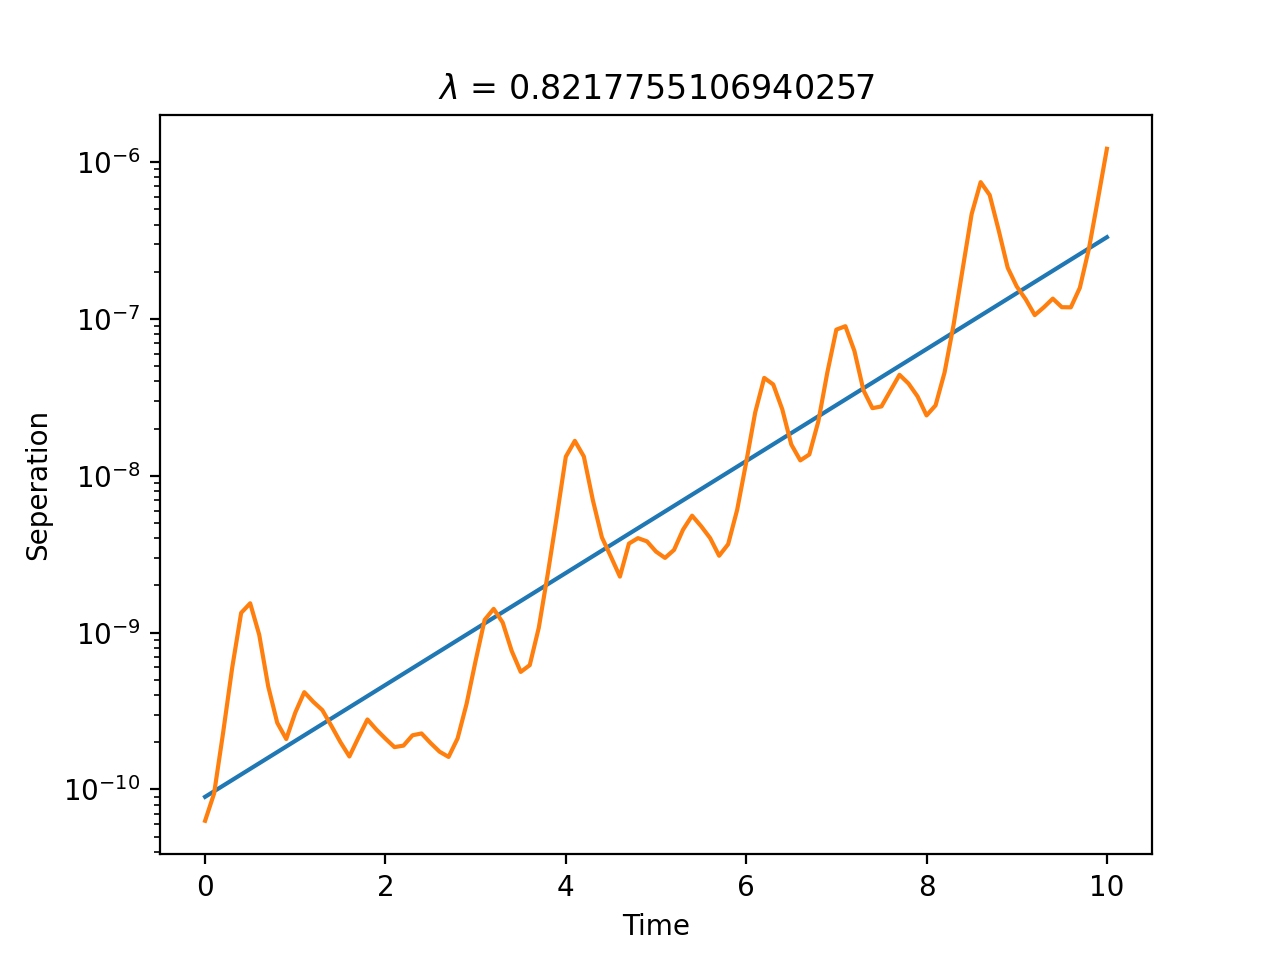

In [11]:
# prepare initial conditions ######################################
x_0 = np.array([np.random.uniform(-15,15),np.random.uniform(-15,15),np.random.uniform(-15,15)])
t_0 = 0
t_f = 20
t = np.arange(t_0, t_f, .1)

# find a solution to the system ###################################
sol_0 = odeint(lorenz, x_0, t)

# strip out x, y, and z data ######################################
x_0_x = sol_0[:, 0]
x_0_y = sol_0[:, 1]
x_0_z = sol_0[:, 2]

# find initial conditions from attraction area ####################
x_0_att_init = np.array([x_0_x[-1],x_0_y[-1],x_0_z[-1]])
x_1_att_init = x_0_att_init + np.random.randn(3)*(1e-10)
t_0 = 0
t_f = 10.1
t = np.arange(t_0, t_f, .1) 

# find a solution with the attraction initial conditions ##########
sol_0_att = odeint(lorenz, x_0_att_init, t)
sol_1_att = odeint(lorenz, x_1_att_init, t)

# find the norm of the difference #################################
delta = []
for i in range(len(sol_0_att)):
    delta.append(np.linalg.norm(sol_0_att[i]-sol_1_att[i]))
delta = np.array(delta)

# calculate the regression line ###################################
regress = linregress(t,np.log(delta))
a = regress.slope
b = regress.intercept

# plot results ####################################################
plt.semilogy(t,np.exp(a*t+b))
plt.semilogy(t,delta)
plt.title("$\lambda$ = " + str(a))
plt.xlabel("Time")
plt.ylabel("Seperation")
plt.show()